## NLP Class Final Project Read Data

# NLP Final Project 1.01: Data Preparation

This notebook serves to:
- download raw data
- pre-clean raw text

## Set-up

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

import warnings
warnings.filterwarnings("ignore")

In [4]:
from pprint import pprint
import re
from tqdm import tqdm
tqdm.pandas()
import numpy as np

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [8]:
#!pwd
import os

# Google Bucket
path = 'msca-sp23-bucket/ml_data'
file = 'BMI-20230313T174553Z-001.zip'

os.chdir(runtime_path)
print(os.getcwd())

/home/jupyter/nlp_AI_news_anlaysis/data


## Read data

In [4]:
#df = pd.read_parquet('news_final_project.parquet', engine='pyarrow')

In [5]:
#df = df_news_final_project.copy()
#df = df.sample(20000, random_state=42)
df.head(5)

,url,date,language,title,text
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld\nSociety\nCulture\nTravel\nScience\nSports\nPhoto\n\nLanguages\n\nChinese\nJapanese\nFrench\nSpanish\nRussian\nArabic\nKorean\nGerman\nPortuguese\nThursday, March 18, 2021\nHome>>\n\t\t\nArtificial intelligence improves parking efficiency in Chinese cities\nBy Liu Shiyao (People's Daily) 09:16, Mar..."
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase in cor..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\nAdvertise\n\nCategories\n\n▸ Editor's Choice\n▸ Multimedia, Videos\n▸ Analogue, Mixed Signal, LSI\n▸ Circuit & System Protection\n▸ Computer/Embedded Technology\n▸ Design Automation\n▸ DSP, Micros & Memory\n▸ Electronics Technology\n▸ Enclosures, Racks, Cabinets & Panel Products\n▸ Events\n▸ Interc..."
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electronics Net\n\nSearch for:\n \nHomeNewsStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered \n \n News\n \n \nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered\n 7 hours...
4,http://www.itbusinessnet.com/2020/10/olympus-to-support-endoscopic-ai-diagnosis-education-for-doctors-in-india-and-to-launch-ai-diagnostic-support-application/?utm_source=rss&utm_medium=rss&utm_campaign=olympus-to-support-endoscopic-ai-diagnosis-education-for-doctors-in-india-and-to-launch-ai-diagnostic-support-application,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Education for Doctors in India and to Launch AI Diagnostic Support Application | | IT Business Net,\n\nOlympus to Support Endoscopic AI Diagnosis Education for Doctors in India and to Launch AI Diagnostic Support Application | | IT Business Net\n \nSkip to content\n\nIT Business Net\n\nNews for IT Professionals\nPrimary Menu\n\nIT Business Net\nAbout IT Business Net\n\nSearch for:\n \nHome2020OctoberOlympus to Support Endoscopic AI Diagnosis Education for Doctors in India and to Launch AI Diagnostic Support Application \n \n News\n ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200332 entries, 0 to 200331
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       200332 non-null  object
 1   date      200332 non-null  object
 2   language  200332 non-null  object
 3   title     200332 non-null  object
 4   text      200332 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


Series([], dtype: float64)


<AxesSubplot:title={'center':"Each column's missing values %"}>

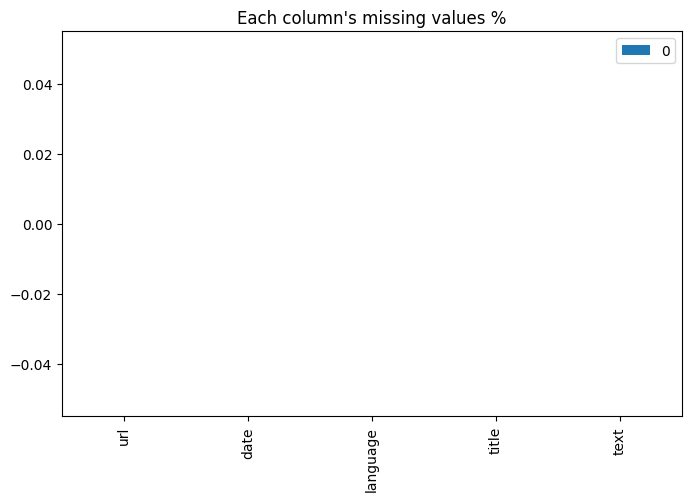

In [7]:
# missing value
print((df.isnull().sum()[df.isnull().sum()/len(df)>0]/len(df)).sort_values(ascending =False))
pd.DataFrame((df.isnull().sum()/len(df)).sort_values(ascending =False)).plot(kind='bar',figsize=(8,5),title='Each column\'s missing values %')

## Text Cleaning

In [6]:
# remove URL (started in '//' or be like 'http\S+') and newline (started in '\n') and url
# only keep alphabet, number, and punctuation

df['text_no_url'] = df['text'].parallel_apply(lambda x: re.sub('http\S+|www\S+|\S+.com|https\S+|\S+.htmlSOURCE|\xa0|\t|©|@',' ',x))
df['text_no_url'] = df['text_no_url'].parallel_apply(lambda x: re.sub('[^A-Za-z0-9.,!?/:;\"\'\s]+', ' ',x))

In [9]:
df[['text','text_no_url']].iloc[2:3,:]

,text,text_no_url
2,"\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\nAdvertise\n\nCategories\n\n▸ Editor's Choice\n▸ Multimedia, Videos\n▸ Analogue, Mixed Signal, LSI\n▸ Circuit & System Protection\n▸ Computer/Embedded Technology\n▸ Design Automation\n▸ DSP, Micros & Memory\n▸ Electronics Technology\n▸ Enclosures, Racks, Cabinets & Panel Products\n▸ Events\n▸ Interc...","\n\nForget ML, AI and Industry 4.0 obsolescence should be your focus 26 February 2021 Test Rework Solutions Dataweek\nHome\nAbout us\nBack issues / E book / PDF\nEMP Handbook\nSubscribe\nAdvertise\n\nCategories\n\n Editor's Choice\n Multimedia, Videos\n Analogue, Mixed Signal, LSI\n Circuit System Protection\n Computer/Embedded Technology\n Design Automation\n DSP, Micros Memory\n Electronics Technology\n Enclosures, Racks, Cabinets Panel Products\n Events\n Interc..."


## Split sentences (rule-based)

**Notes:**
1. What is the best way to split sentences?
    - rule-based approach
        - `\n\n` sign: paragraphs in new articles normally breaks with two new lines. If we can break the whole document into sentences by `\n\n`, we can select the sentences has the most words as the title of the article.
        - `all rights reserved` sign: this sign is normally at the end of the article. If we can break the whole document into sentences by `all rights reserved`, we can select the sentences before the break word as the content.
    - model-based approach
        - `spacy` sentence tokenizer

In [16]:
# create a new True/False column telling whether each value of column 'text_url' has the string "all rights reserved", case insensitive
df['spilit_check'] = df['text_no_url'].parallel_apply(lambda x: True if re.search('all rights reserved', x, re.IGNORECASE) else False)

In [19]:
df['spilit_check'].value_counts()

False    138619
True      61713
Name: spilit_check, dtype: int64

Only about 40% of the articles include "all rights reserved" sign. So we need more filtering rules.

In [7]:
# define a function to split text with "all right reserved" into sentences
def words_split(search_word, input_text):
    if re.search(search_word, input_text, re.IGNORECASE):
        split_list = input_text.split(search_word)
        if len(split_list) <= 2:
            return split_list[0]
        elif len(split_list) > 2: # return everything before the last split
            print('multiple split')
            return split_list[:-1]
        else:
            return 'bug'
    else: # return input if no search_word in input_text
        return input_text

In [8]:
# split text with our function
df['text_split'] = df['text_no_url'].parallel_apply(lambda x: words_split('all rights reserved', x))

In [39]:
'''# debug
test = df.iloc[0,:]['text_no_url']
words_split('all rights reserved', test)
# check results
df[['text_no_url','text_split']]'''

"\n\nArtificial intelligence improves parking efficiency in Chinese cities   People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld\nSociety\nCulture\nTravel\nScience\nSports\nPhoto\n\nLanguages\n\nChinese\nJapanese\nFrench\nSpanish\nRussian\nArabic\nKorean\nGerman\nPortuguese\nThursday, March 18, 2021\nHome \n  \nArtificial intelligence improves parking efficiency in Chinese cities\nBy Liu Shiyao  People's Daily  09:16, March 18, 2021\nPhoto taken on July 1, 2019, shows a sign for electronic toll collection  ETC  newly set up at a roadside parking space on Yangzhuang road, Shijingshan district, Beijing. Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019.  People s Daily Online/Li Wenming \n\n Thanks to the application of an artificial intelligence  AI empowered roadside electronic toll collection  ETC  system, China s capital city Beijing has seen significant improvemen

In [9]:
# split 'text_sent' by '\n\n'
df['text_split'] = df['text_split'].parallel_apply(lambda x: x.split('\n\n'))

In [43]:
# get the length of each text_split
text_split_len = df['text_split'].parallel_apply(lambda x: len(x))

In [45]:
text_split_len.describe()

count    200332.000000
mean         54.302128
std          92.590373
min           1.000000
25%           2.000000
50%          27.000000
75%          67.000000
max        4314.000000
Name: text_split, dtype: float64

Now we see a distribution of the number of trunks per observation. 1/4 of the news has less than 2 trunks spilt by `\n\n` and the media length in 27 trunks. We can calculate the average length of the trunks and use it as a threshold to filter out the trunks that have less length.

In [23]:
# get average length of element in each obversation (text_split)
def get_length(text_list):
    '''
    Take in a list of text trunks (dtype: str), find their index and lentgh, return a list of tuple, containing the index and length
    '''
    text_len = []
    for idx, text in enumerate(text_list):
        text_len.append((idx, len(text)))
    return text_len

def filter_text_trunk(text_list):
    '''
    Takes in the output of get_length(); 
    1. calculate the average length of the input: extract the length from each tuple, then calculate the average;
    2.1. filter out the text trunk whose length is less than the average lenghth by droppling the index of the tuple in the text_len results
    2.2. extract only the index form the reamining tuples; 
    3. keep theh trunk in the original input using index
    '''
    # 1. get avg length
    text_len = get_length(text_list)
    text_len_ttl = [i[1] for i in text_len]
    text_len_avg = sum(text_len_ttl)/len(text_len_ttl)
    threshold = text_len_avg/2
    # 2.1 & 2.2 filter out text trunk whose length is less than avg length
    filtered_text_len_idx = [i[0] for i in text_len if i[1] >= threshold]
    # sort the elements in the list
    filtered_text_len_idx.sort()
    # 3. keep the trunk in the original input using index
    filtered_text = [text_list[i] for i in filtered_text_len_idx]
    return filtered_text

In [24]:
# before we apply, we need to clean the `\n` in each text trunk
df['text_split_filtered'] = df['text_split'].parallel_apply(lambda x: [re.sub('\n|\n \n',' ',i) for i in x])

# apply function to df
df['text_split_filtered'] = df['text_split_filtered'].parallel_apply(lambda x: filter_text_trunk(x))

In [43]:
df[['title','text_no_url', 'text_split_filtered']].sample(5)
#df[['title','text_no_url', 'text_split_filtered']].head(5)

,title,text_no_url,text_split_filtered
6297,A data scientist's guide to open source community analysis | Opensource.com,\n\nA data scientist's guide to open munity analysis \n\n Skip to main content\n \nUser account menu\n\n\nLog in\n\n\nSign Up\n\n\nFacebook\n\n\nTwitter\n\n\nRSS\nMain navigation\n\n\nArticles\n\n\nLinux\n\n\nCommand line\n\nKubernetes\n\n\nProgramming\n\n\nGo\n\n\nJavaScript\n\n\nPython\n\nContainers\n\n\nSysadmin\n\n\nDevOps\n\n\nGaming\n\n\nHardware\n\n\n3D printing\n\n\nArduino\n\n\nRaspberry Pi\n\nGovernment\n\n\nLaw\n\n\nOpen Organization\n\n\nWhat is an open organization?\...,"[Consider this framework for establishing data analysis of your own open source project. By , Image by: In the golden age of data analysis, open munities are not exempt from the frenzy around getting some big, fancy numbers onto presentation slides. Such information can bring even more value if you master the art of generating a well analyzed question with proper execution. You might expect me, a data scientist, to tell you that data analysis and automation will inform munity d..."
85796,2021-2027 Blockchain AI Market Analysis: Industry Showing Massive Growth in Future by – The Market Eagle,"\n\n2021 2027 Blockchain AI Market Analysis: Industry Showing Massive Growth in Future by The Market Eagle\n\r\nSkip to content\n\nMon. Apr 5th, 2021 \n\n The Market Eagle\nNews\n \n \n \nEnergy\nNews\nSpace\nAll News\nContact\n \n\n\n \n \r\n All News\r\n \r\n News\r\n \n \r\n 2021 2027 Blockchain AI Market Analysis: Industry Showing Mas...","[2021 2027 Blockchain AI Market Analysis: Industry Showing Massive Growth in Future by The Market Eagle \r Skip to content, \r All News\r \r News\r \r 2021 2027 Blockchain AI Market Analysis: Industry Showing Massive Growth in Future by, Blockchain AI Market, Blockchain AI Market Analysis, Blockchain AI Market Forecast, Blockchain AI Market..."
172229,"Artificial Intelligence Market Detail Analysis focusing on Key Players like Google Inc., IBM Corporation, Microsoft Corporation, General Vision, Enlitic, Inc., Next IT Corporation, – The Courier","\nArtificial Intelligence Market Detail Analysis focusing on Key Players like Google Inc., IBM Corporation, Microsoft Corporation, General Vision, Enlitic, Inc., Next IT Corporation, The Courier\n\n\r\n Monday, December 7 2020 \n\nBreaking News\nCognitive Data Management Market Outlook, Geographical Segmentation, Industry Size Share, Comprehensive Analysis to 2027\n\n\nGlobal Clinical Electrophoresis Market Research Insights 2020 2026\n\n\nGlobal Diabetic Neuropathy Market Insig...","[ Artificial Intelligence Market Detail Analysis focusing on Key Players like Google Inc., IBM Corporation, Microsoft Corporation, General Vision, Enlitic, Inc., Next IT Corporation, The Courier, Breaking News Cognitive Data Management Market Outlook, Geographical Segmentation, Industry Size Share, Comprehensive Analysis to 2027, Industrial Ethernet Market Proceeds To Witness Huge Upswing Over Assessment Period by 2025 Alphabet, Facebook, Baidu, Cloud Based Contact Center Market Deta..."
71184,The sentience debate in the era of generative AI is getting hotter | Mint,"\n\n\nThe sentience debate in the era of generative AI is getting hotter Mint \n\n Get the latest financial, economic and market news, instantly. I'll Do This LaterAllow\n Sign InMy AccountSubscribeMy Readse paperNewslettersIFSC Code Finder NewWeb StoriesMintGenieFor You\n \nTop Sections News Companies Company NewsStart upsCompany ResultsTop Company Leader Technology GadgetsTech ReviewsApp NewsFoldable Smartphones5G Tech Markets Stock MarketsCommodity NewsMark To MarketIPO NewsLive Blog...","[ Get the latest financial, economic and market news, instantly. I'll Do This LaterAllow Sign InMy AccountSubscribeMy Readse paperNewslettersIFSC Code Finder NewWeb StoriesMintGenieFor You Top Sections News Companies Company NewsStart upsCompany ResultsTop Company Leader Technology GadgetsTech ReviewsApp NewsFoldable Smartphones5G T

In [28]:
# original article length
len(df[['title','text_no_url', 'text_split_filtered']].iloc[0,1])

5709

In [31]:
# get total length of the tmp
tmp = df[['title','text_no_url', 'text_split_filtered']].iloc[0,2]
tmp_len = [len(i) for i in tmp]
sum(tmp_len)

5437

In [46]:
# save a checkpoint results
df = df[['url', 'date', 'language', 'title', 'text', 'text_split_filtered']]
df.head()

,url,date,language,title,text,text_split_filtered
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld\nSociety\nCulture\nTravel\nScience\nSports\nPhoto\n\nLanguages\n\nChinese\nJapanese\nFrench\nSpanish\nRussian\nArabic\nKorean\nGerman\nPortuguese\nThursday, March 18, 2021\nHome>>\n\t\t\nArtificial intelligence improves parking efficiency in Chinese cities\nBy Liu Shiyao (People's Daily) 09:16, Mar...","[Chinese Japanese French Spanish Russian Arabic Korean German Portuguese Thursday, March 18, 2021 Home Artificial intelligence improves parking efficiency in Chinese cities By Liu Shiyao People's Daily 09:16, March 18, 2021 Photo taken on July 1, 2019, shows a sign for electronic toll collection ETC newly set up at a roadside parking space on Yangzhuang road, Shijingshan district, Beijing. Some urban areas of the city started to use ETC system for roadside parking spaces since July 1..."
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase in cor...","[ Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot News Parliament , Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot , Author Recent Posts admin Latest posts by admin see all Mansplaining in conferences: How can we get him to forestall? February 27, 2020 Coronavirus Could Explode in the U.S. Overnight Like it Did in Italy February 27, 2020 Levi Strauss marks the ..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\nAdvertise\n\nCategories\n\n▸ Editor's Choice\n▸ Multimedia, Videos\n▸ Analogue, Mixed Signal, LSI\n▸ Circuit & System Protection\n▸ Computer/Embedded Technology\n▸ Design Automation\n▸ DSP, Micros & Memory\n▸ Electronics Technology\n▸ Enclosures, Racks, Cabinets & Panel Products\n▸ Events\n▸ Interc...","[Forget ML, AI and Industry 4.0 obsolescence should be your focus 26 February 2021 Test Rework Solutions Dataweek Home About us Back issues / E book / PDF EMP Handbook Subscribe Advertise, Editor's Choice Multimedia, Videos Analogue, Mixed Signal, LSI Circuit System Protection Computer/Embedded Technology Design Automation DSP, Micros Memory Electronics Technology Enclosures, Racks, Cabinets Panel Products Events Interconnection Manufacturing / Product..."
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net

In [16]:
#df.to_parquet('checkpoint_0512_sent_split.parquet', index=False)
df = pd.read_parquet(path_bucket, engine='pyarrow')
df.head()

,url,date,language,title,text,text_split_filtered
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld\nSociety\nCulture\nTravel\nScience\nSports\nPhoto\n\nLanguages\n\nChinese\nJapanese\nFrench\nSpanish\nRussian\nArabic\nKorean\nGerman\nPortuguese\nThursday, March 18, 2021\nHome>>\n\t\t\nArtificial intelligence improves parking efficiency in Chinese cities\nBy Liu Shiyao (People's Daily) 09:16, Mar...","[Chinese Japanese French Spanish Russian Arabic Korean German Portuguese Thursday, March 18, 2021 Home Artificial intelligence improves parking efficiency in Chinese cities By Liu Shiyao People's Daily 09:16, March 18, 2021 Photo taken on July 1, 2019, shows a sign for electronic toll collection ETC newly set up at a roadside parking space on Yangzhuang road, Shijingshan district, Beijing. Some urban areas of the city started to use ETC system for roadside parking spaces since July 1..."
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase in cor...","[ Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot News Parliament , Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot , Author Recent Posts admin Latest posts by admin see all Mansplaining in conferences: How can we get him to forestall? February 27, 2020 Coronavirus Could Explode in the U.S. Overnight Like it Did in Italy February 27, 2020 Levi Strauss marks the ..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\nAdvertise\n\nCategories\n\n▸ Editor's Choice\n▸ Multimedia, Videos\n▸ Analogue, Mixed Signal, LSI\n▸ Circuit & System Protection\n▸ Computer/Embedded Technology\n▸ Design Automation\n▸ DSP, Micros & Memory\n▸ Electronics Technology\n▸ Enclosures, Racks, Cabinets & Panel Products\n▸ Events\n▸ Interc...","[Forget ML, AI and Industry 4.0 obsolescence should be your focus 26 February 2021 Test Rework Solutions Dataweek Home About us Back issues / E book / PDF EMP Handbook Subscribe Advertise, Editor's Choice Multimedia, Videos Analogue, Mixed Signal, LSI Circuit System Protection Computer/Embedded Technology Design Automation DSP, Micros Memory Electronics Technology Enclosures, Racks, Cabinets Panel Products Events Interconnection Manufacturing / Product..."
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net

In [17]:
df.shape

(200332, 6)

In [ ]:
# import spacy
# import spacy.cli
# spacy.cli.download("en_core_web_md")
# nlp = spacy.load("en_core_web_md")